In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite


engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.


most_recent_date = session.query(func.max(Measurement.date)).all()
max_date = most_recent_date[0][0]
max_date


'2017-08-23'

In [24]:
first_row = session.query(Measurement).first()
first_row.__dict__ 


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd0e053dac0>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

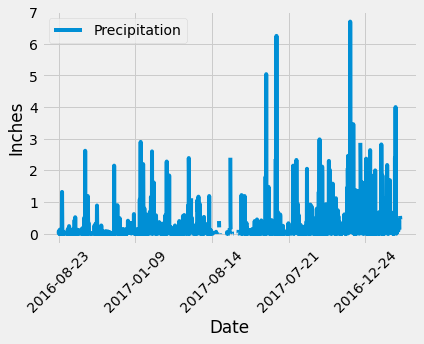

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

oneyear = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= oneyear).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data, columns = ["Date", "Precipitation"])
df.set_index("Date", inplace=True)

# Sort the dataframe by date
df.sort_values(by="Date")


# Use Pandas Plotting with Matplotlib to plot the data

df.plot(rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc="upper left")
plt.show()

In [49]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(Measurement).group_by(Measurement.station).count()
total_station

9

In [45]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
total_station= session.query(Measurement.station, func.count(Measurement.id)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.date).desc()).all()

active_station= session.query(Measurement.station, func.count(Measurement.id)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.date).desc()).first()

print(f"Most active station is: {active_station[0]}.")
print(total_station)


Most active station is: USC00519281.
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temps= session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == active_station[0]).all()
station_temps

[(54.0, 85.0, 71.66378066378067)]

In [47]:
#cleanning the above return w/ print statements

print(f'station identifier: {active_station[0]}')
print(f'The max temp is: {round(station_temps[0][1],2)}')
print(f'The min temp is: {round(station_temps[0][0],2)}')
print(f'The avg temp is: {round(station_temps[0][2],2)}')

station identifier: USC00519281
The max temp is: 85.0
The min temp is: 54.0
The avg temp is: 71.66


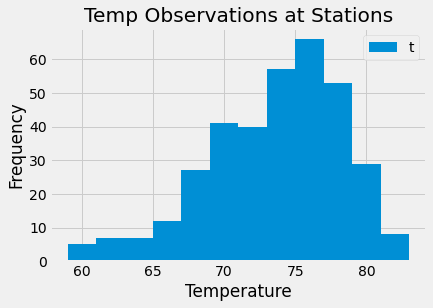

In [48]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temps = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.station == "USC00519281").\
        filter(Measurement.date <= max_date).\
        filter(Measurement.date >= oneyear).\
        order_by(Measurement.date.asc()).all()
station_temps

station_temp_df = pd.DataFrame(station_temps, columns=['date', 'tobs'])


plt.hist(station_temp_df["tobs"],bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temp Observations at Stations')
plt.legend("temp")
plt.show()

# Close session

In [20]:
# Close Session
session.close()